# House Price Prediction  

## 1 Uploading libraries and the dataset

In [1]:
import numpy as np 
import pandas as pd
import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

In [2]:
# Uploading the dataset from keras datasets
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()
# Uploading and labeling the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

## 2 Describing the shape, mean, max and min of the dataset

![title](info.png)

In [3]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## 3 Find the correlation

<AxesSubplot:>

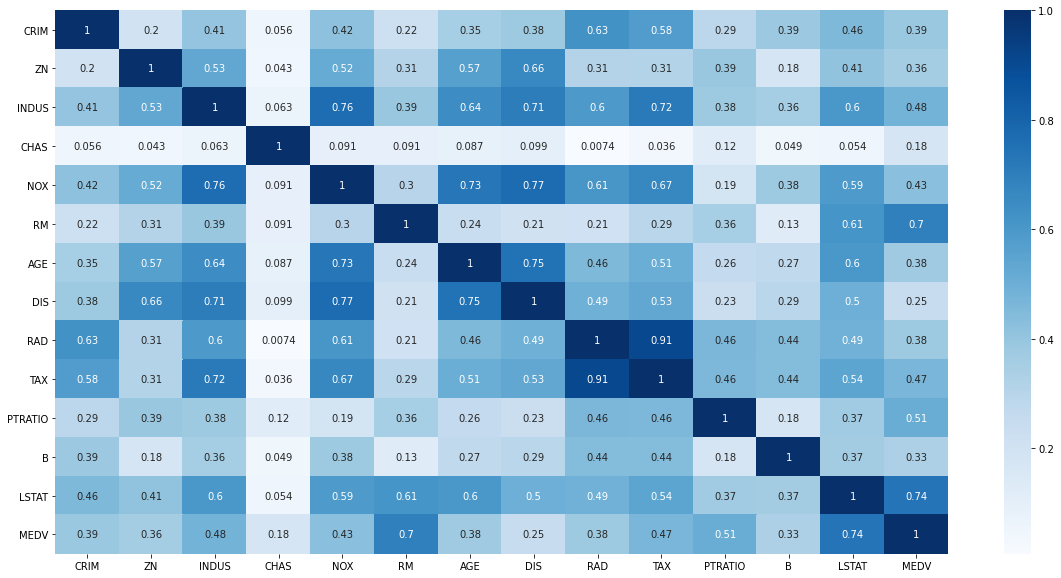

In [4]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True, cbar=True, cmap='Blues')

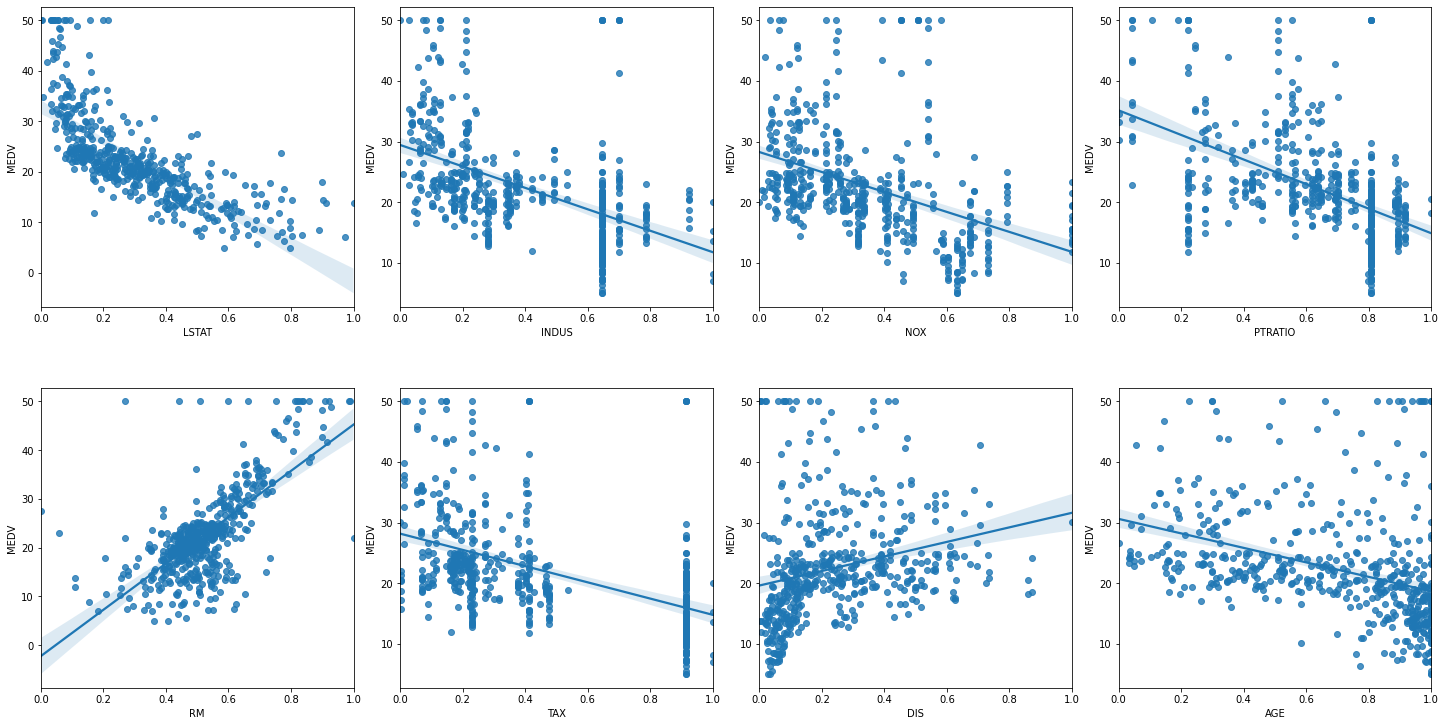

In [54]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## 4 Defining the batch size, epochs and input size

In [5]:
batch_size = 32
epochs = 800
inp_shape = train_features.shape[1]

## 5 Normalize the data by using Z score

In [6]:
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

## 6 Defining the model

In [41]:
model = Sequential([
    Dense(7, activation='relu', input_shape=(inp_shape,)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

## Exectuting the MLP model

In [42]:
history = model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model.evaluate(test_features, test_labels)

1 - mae: 2.1166 - mse: 8.6841 - val_loss: 7.3691 - val_mae: 2.4092 - val_mse: 7.3691
Epoch 681/800
12/12 [==============================] - 0s 6ms/step - loss: 8.6702 - mae: 2.1127 - mse: 8.6702 - val_loss: 7.3207 - val_mae: 2.4011 - val_mse: 7.3207
Epoch 682/800
12/12 [==============================] - 0s 7ms/step - loss: 8.6599 - mae: 2.1104 - mse: 8.6599 - val_loss: 7.3368 - val_mae: 2.4038 - val_mse: 7.3368
Epoch 683/800
12/12 [==============================] - 0s 16ms/step - loss: 8.6872 - mae: 2.1129 - mse: 8.6872 - val_loss: 7.2597 - val_mae: 2.3859 - val_mse: 7.2597
Epoch 684/800
12/12 [==============================] - 0s 10ms/step - loss: 8.6570 - mae: 2.1045 - mse: 8.6570 - val_loss: 7.2688 - val_mae: 2.3872 - val_mse: 7.2688
Epoch 685/800
12/12 [==============================] - 0s 7ms/step - loss: 8.6543 - mae: 2.1042 - mse: 8.6543 - val_loss: 7.2638 - val_mae: 2.3878 - val_mse: 7.2638
Epoch 686/800
12/12 [==============================] - 0s 8ms/step - loss: 8.6462 - mae:

[69872.03125, 180.54959106445312, 69872.03125]

## 8 Comparing Mean Squared Error and Value Loss

(0.0, 100.0)

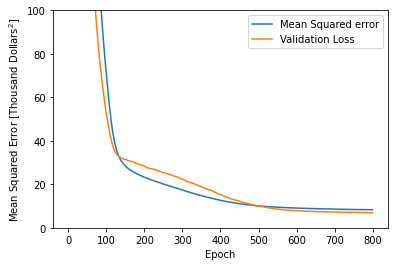

In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error [Thousand Dollars$^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Mean Squared error')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Validation Loss')
plt.legend()
plt.ylim([0,100])

In [44]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 18.2637 - mae: 2.8783 - mse: 18.2637


In [55]:
predicted = model.predict(test_features_norm)
np.set_printoptions(precision=2)
print(np.column_stack((test_labels, predicted )))

[[ 7.2   9.28]
 [18.8  19.51]
 [19.   21.5 ]
 [27.   37.54]
 [22.2  23.93]
 [24.5  21.4 ]
 [31.2  27.3 ]
 [22.9  21.38]
 [20.5  20.15]
 [23.2  22.18]
 [18.6  11.82]
 [14.5  16.06]
 [17.8  16.43]
 [50.   41.35]
 [20.8  22.09]
 [24.3  19.8 ]
 [24.2  23.92]
 [19.8  20.9 ]
 [19.1  17.4 ]
 [22.7  26.84]
 [12.   10.82]
 [10.2  16.02]
 [20.   21.37]
 [18.5  14.14]
 [20.9  22.54]
 [23.   24.88]
 [27.5  30.17]
 [30.1  30.47]
 [ 9.5  10.28]
 [22.   20.5 ]
 [21.2  20.98]
 [14.1  15.1 ]
 [33.1  32.34]
 [23.4  22.69]
 [20.1  17.01]
 [ 7.4   8.47]
 [15.4  16.75]
 [23.8  17.13]
 [20.1  20.8 ]
 [24.5  26.77]
 [33.   30.54]
 [28.4  24.77]
 [14.1  13.48]
 [46.7  42.13]
 [32.5  27.13]
 [29.6  24.46]
 [28.4  24.93]
 [19.8  19.28]
 [20.2  22.87]
 [25.   22.88]
 [35.4  33.61]
 [20.3  18.9 ]
 [ 9.7  11.72]
 [14.5  16.09]
 [34.9  36.71]
 [26.6  25.24]
 [ 7.2  12.6 ]
 [50.   47.6 ]
 [32.4  33.76]
 [21.6  22.38]
 [29.8  26.22]
 [13.1  18.38]
 [27.5  17.28]
 [21.2  20.74]
 [23.1  22.1 ]
 [21.9  23.25]
 [13.   13